In [32]:
from mtcnn.mtcnn import MTCNN

In [33]:
import os
from PIL import Image
import numpy as np

In [34]:
import cv2

In [59]:
LOCATION = '../humans_of_paris/app/static/images/'
pictures = os.listdir(LOCATION)

In [60]:
model = MTCNN()

In [109]:
f = []
for pic in pictures:
    if '.' != pic[0]:
        image = Image.open(LOCATION + pic)
        img = np.array(image)
        faces = model.detect_faces(img)
        if len(faces) > 0:
            faces[0]['source'] = pic
            f.append(faces[0])
        else:
            f.append({'source': pic})

In [110]:
import pandas as pd

In [111]:
df_faces = pd.DataFrame(f)

In [112]:
df_faces[df_faces.source == 'btv1b53050335c.jpg']

,box,confidence,keypoints,source
570,"[37, 50, 145, 179]",0.999966,"{'left_eye': (73, 116), 'right_eye': (138, 117...",btv1b53050335c.jpg


In [113]:
len(df_faces[df_faces.confidence.isna()])

13

In [114]:
len(df_faces[df_faces.confidence.isna()])

13

/Users/lguillain/opt/anaconda3/envs/fdh/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='hist')` instead of `Series.plot('hist',)`.
  """Entry point for launching an IPython kernel.


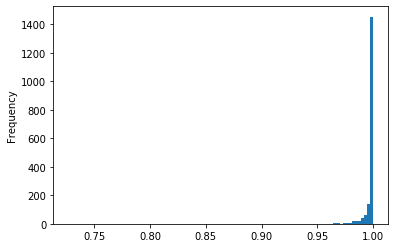

In [115]:
df_faces.confidence.plot('hist', bins=100)

In [119]:
len(df_faces[df_faces.box.isna()].source)

13

In [117]:
import matplotlib.pyplot as plt
%matplotlib inline

btv1b53100728j.jpg


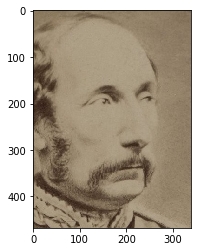

btv1b531390941.jpg


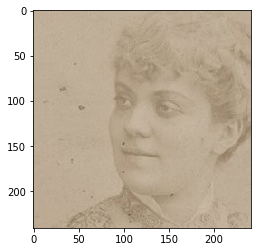

btv1b531007328.jpg


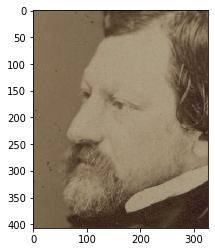

btv1b53100735m.jpg


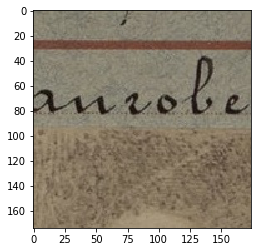

btv1b53118796m.jpg


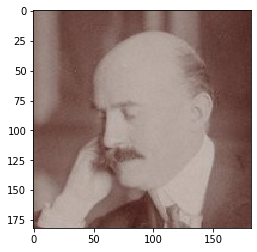

btv1b531471763.jpg


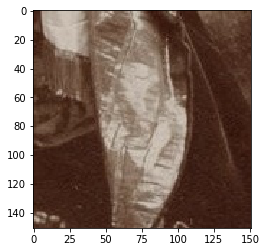

btv1b531007362.jpg


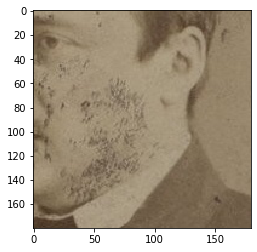

btv1b53092363n.jpg


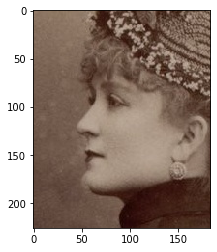

btv1b531189397.jpg


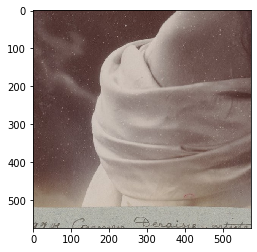

btv1b53181053q.jpg


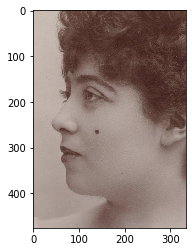

btv1b53100737h.jpg


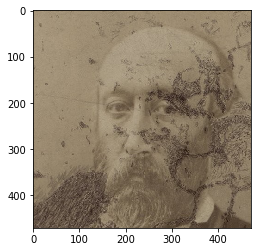

btv1b53072607g.jpg


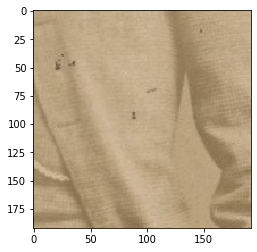

btv1b530660792.jpg


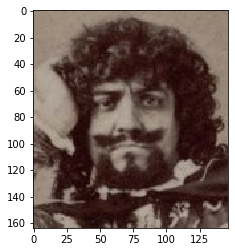

In [137]:
for pic in df_faces[df_faces.box.isna()].source.tolist():
    print(pic)
    image = Image.open(LOCATION + pic)
    img = np.array(image)
    plt.imshow(img)
    plt.show()

In [127]:
to_find = [x[:-len('.jpg')] for x in df_faces[df_faces.box.isna()].source.tolist()]

In [139]:
merged = pd.read_pickle('data/merged_dataframe.pkl')

In [140]:
merged.columns

Index(['id', 'name', 'gender', 'id_list', 'weight', 'note', 'bnf_link',
       'wiki_en_text', 'wiki_en_link', 'wiki_fr_text', 'url_fr',
       'age_estimate', 'gender_estimate', 'tags'],
      dtype='object')

In [131]:
merged['id2'] = merged.\
            id.apply(lambda x: x.split('/')[-1] if isinstance(x, str) else None)

In [107]:
import requests 
from io import BytesIO

def get_face_image(doc):
    output_file = '../humans_of_paris/app/static/images/'+doc
    print(output_file)
    img = get_image(doc)
    faces = model.detect_faces(img)
    if len(faces) > 0:
        print(faces[0]['confidence'])
        minx, miny, maxx, maxy = faces[0]['box']
    else:
        print(faces)
        return
    cropped = crop(img, minx-40, miny-40, minx+maxx+40, miny+maxy+40)
    plt.imshow(cropped)
    plt.show()
    cv2.imwrite(output_file,  cv2.cvtColor(cropped, cv2.COLOR_RGB2BGR))
    
def get_image(doc, use_raw=False):
    url = 'https://gallica.bnf.fr/ark:/12148/'+doc[:-len('.png')]+'/f1.highres.jpg'
    
    response = requests.get(url)
    img = Image.open(BytesIO(response.content)).convert('RGB')
    img = np.array(img)
    return img

def crop(img, minx, miny, maxx, maxy):
    return img[miny:maxy, minx:maxx]

../humans_of_paris/app/static/images/btv1b53100728j.jpg
0.9734497666358948


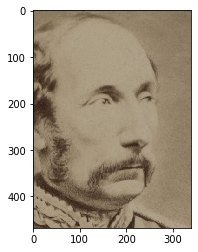

../humans_of_paris/app/static/images/btv1b531390941.jpg
[]
../humans_of_paris/app/static/images/btv1b530505193.jpg
0.9996968507766724


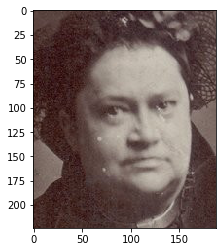

../humans_of_paris/app/static/images/btv1b53170703n.jpg
0.9997523427009583


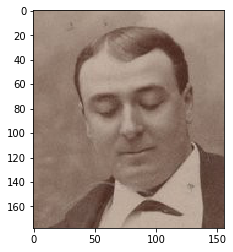

../humans_of_paris/app/static/images/btv1b53050561k.jpg
0.9986679553985596


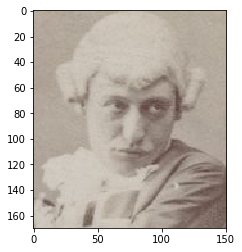

../humans_of_paris/app/static/images/btv1b531007328.jpg
0.9338212609291077


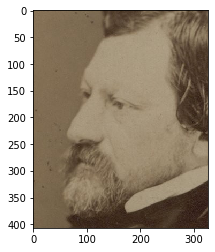

../humans_of_paris/app/static/images/btv1b53117515r.jpg
0.9973962306976318


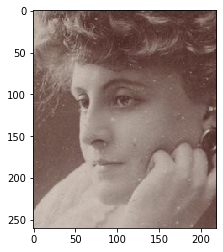

../humans_of_paris/app/static/images/btv1b53065937k.jpg
0.9961530566215515


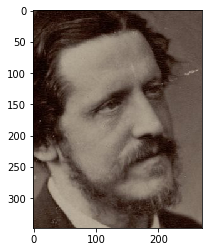

../humans_of_paris/app/static/images/btv1b53100735m.jpg
[]
../humans_of_paris/app/static/images/btv1b53118796m.jpg
[]
../humans_of_paris/app/static/images/btv1b53050620v.jpg
0.9999587535858154


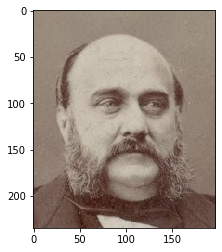

../humans_of_paris/app/static/images/btv1b53050335c.jpg
0.9996411800384521


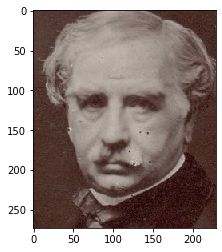

../humans_of_paris/app/static/images/btv1b531009215.jpg
0.9830151796340942


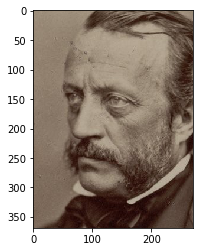

../humans_of_paris/app/static/images/btv1b531471763.jpg
[]
../humans_of_paris/app/static/images/btv1b531173635.jpg
0.8597434759140015


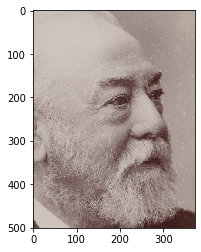

../humans_of_paris/app/static/images/btv1b531173813.jpg
0.9902386665344238


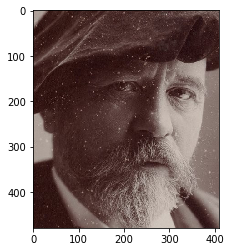

../humans_of_paris/app/static/images/btv1b53050726x.jpg
0.9948729872703552


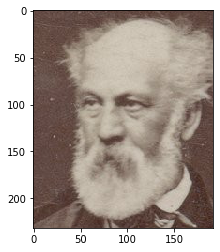

../humans_of_paris/app/static/images/btv1b531007362.jpg
[]
../humans_of_paris/app/static/images/btv1b53092363n.jpg
0.9930330514907837


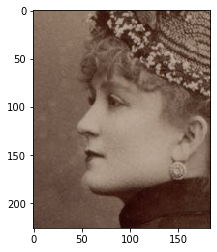

../humans_of_paris/app/static/images/btv1b53144536x.jpg
0.9998990297317505


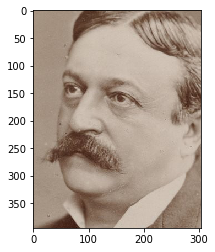

../humans_of_paris/app/static/images/btv1b531714405.jpg
0.9989498257637024


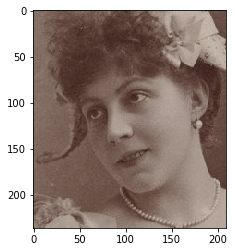

../humans_of_paris/app/static/images/btv1b53050818s.jpg
0.9994571805000305


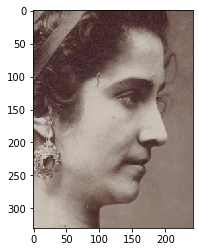

../humans_of_paris/app/static/images/btv1b53080074c.jpg
0.9813869595527649


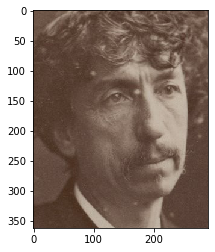

../humans_of_paris/app/static/images/btv1b530504220.jpg
0.9796293377876282


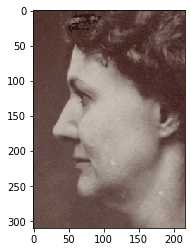

../humans_of_paris/app/static/images/btv1b53050681s.jpg
0.9959158301353455


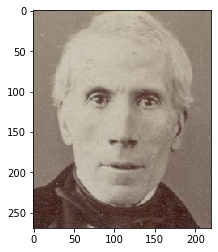

../humans_of_paris/app/static/images/btv1b53080257n.jpg
0.9998522996902466


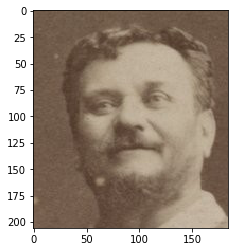

../humans_of_paris/app/static/images/btv1b53155955g.jpg
0.9959242343902588


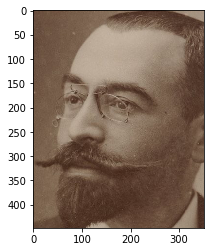

../humans_of_paris/app/static/images/btv1b531189397.jpg
[]
../humans_of_paris/app/static/images/btv1b53187715p.jpg
0.9958732724189758


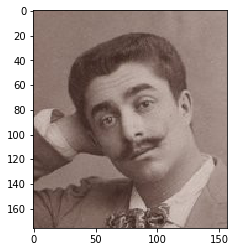

../humans_of_paris/app/static/images/btv1b53181053q.jpg
0.9607813358306885


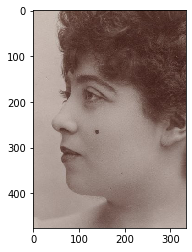

../humans_of_paris/app/static/images/btv1b53100737h.jpg
[]
../humans_of_paris/app/static/images/btv1b53146973f.jpg
0.9876407980918884


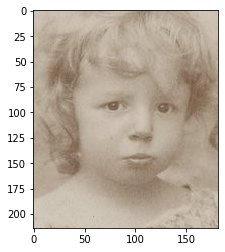

../humans_of_paris/app/static/images/btv1b531812521.jpg
0.9988166093826294


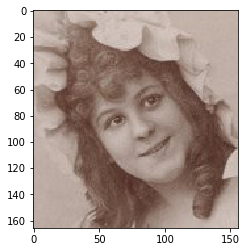

../humans_of_paris/app/static/images/btv1b53050555z.jpg
0.9975166320800781


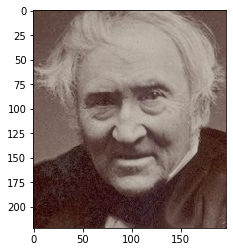

../humans_of_paris/app/static/images/btv1b53072607g.jpg
[]
../humans_of_paris/app/static/images/btv1b530663868.jpg
0.9960773587226868


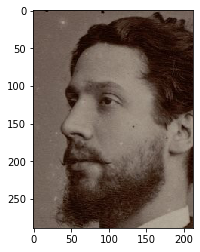

../humans_of_paris/app/static/images/btv1b530923302.jpg
0.9993624091148376


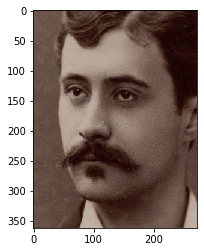

../humans_of_paris/app/static/images/btv1b531345768.jpg
0.9674455523490906


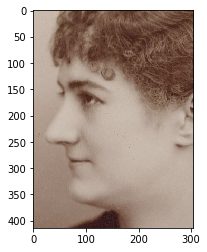

../humans_of_paris/app/static/images/btv1b53170852n.jpg
0.963352620601654


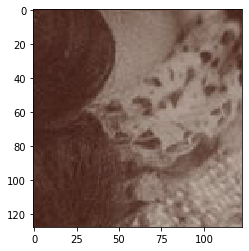

../humans_of_paris/app/static/images/btv1b53107167w.jpg
0.997126042842865


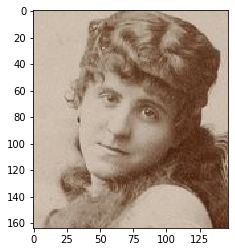

../humans_of_paris/app/static/images/btv1b53071525p.jpg
0.9966321587562561


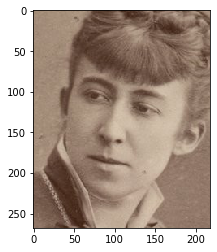

../humans_of_paris/app/static/images/btv1b530508051.jpg
0.9875806570053101


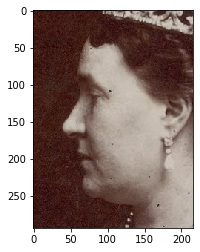

../humans_of_paris/app/static/images/btv1b53100895g.jpg
0.9969268441200256


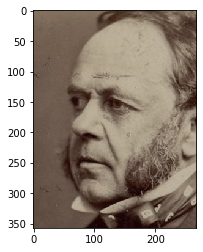

../humans_of_paris/app/static/images/btv1b530660792.jpg
0.9832639098167419


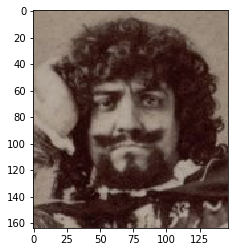

../humans_of_paris/app/static/images/btv1b53187712b.jpg
0.998781144618988


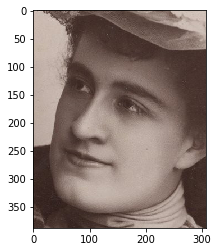

../humans_of_paris/app/static/images/btv1b53107845t.jpg
0.9991084933280945


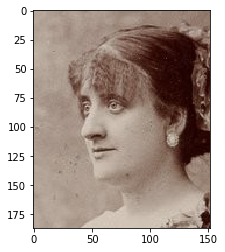

../humans_of_paris/app/static/images/btv1b53065457h.jpg
0.9673274755477905


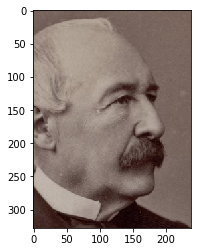

../humans_of_paris/app/static/images/btv1b530657922.jpg
0.9999996423721313


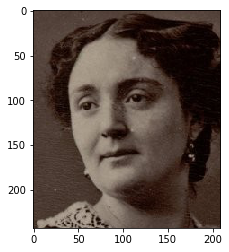

../humans_of_paris/app/static/images/btv1b530978314.jpg
0.9816473126411438


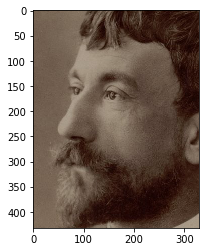

../humans_of_paris/app/static/images/btv1b53050808c.jpg
0.9999244213104248


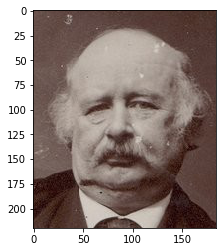

../humans_of_paris/app/static/images/btv1b531043826.jpg
0.9993190765380859


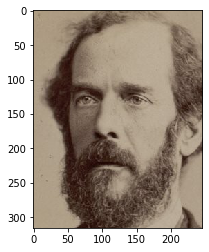

In [108]:
for source in df_faces[df_faces.box.isna()].source.tolist():
    get_face_image(source)